<a href="https://colab.research.google.com/github/PondKann/CXR-Project/blob/main/Perceptron00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Single Layer Perceptron 




    
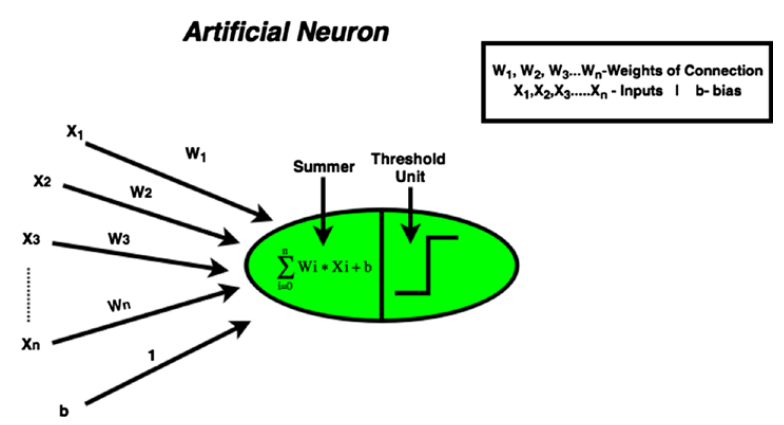

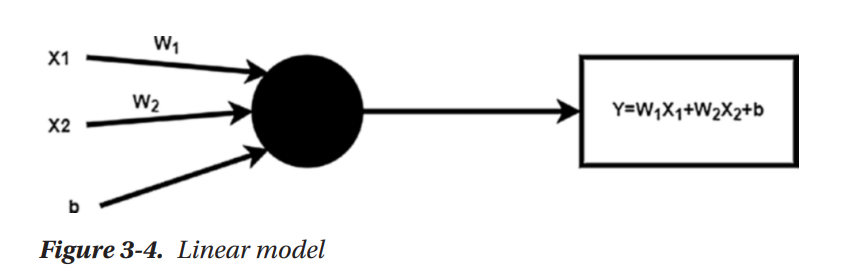

In [89]:
x_input = [0.1, 0.5, 0.2]
w_weights = [0.4, 0.3, 0.6]
threshold = 0.5                                 #ตั้งเกณฑ์

def step(weighted_sum):                      #ฟังก์ชันชื่อ step 
    if weighted_sum > threshold:            #ถ้า weighted_sum มากกว่า threshold ให้เป็นค่า 1
        return 1
    else:
        return 0
    
def perceptron():                                   #
    weighted_sum = 0
    
    for x,w in zip(x_input, w_weights):     #รันไปตามทุกตัวของ  x_input และ  w_weights 
        weighted_sum += x*w                  # x*w แล้ว นำไปเก็บใน weighted_sum
        print(weighted_sum)                      #ปริ้น weighted_sum       
    return step(weighted_sum)                 #แสดงค่า ที่ได้จาก ฟังก์ชัน step 

output =  perceptron()                                  
print("output: " + str(output))

0.04000000000000001
0.19
0.31
output: 0


## Multileyer Perceptron 1.1
Iris dataset

In [61]:
from sklearn.model_selection import train_test_split
iris = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')

In [62]:
iris.shape

(150, 5)

In [63]:
iris = iris[:100]
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [76]:
type(iris["SepalLength"][0])

numpy.float64

In [77]:
iris[['Name']] = iris[['Name']].replace("Iris-setosa",0)
iris[['Name']] = iris[['Name']].replace("Iris-versicolor",1)

In [78]:
iris['Name'].unique()

array([0, 1])

In [79]:
X=iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y=iris[['Name']]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=7)

In [81]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(70, 4) (30, 4) (70, 1) (30, 1)


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from numpy import loadtxt

In [83]:
model = Sequential()
model.add(Dense(32, input_dim = 4 , activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [85]:
model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['Accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=10)

In [87]:
loss, accuracy = model.evaluate(X_test, y_test)
print('model loss: %.2f , accuracy: %.2f ' % ((loss*100), (accuracy*100)))

1/1 [==============================] - 0s 113ms/step - loss: 0.0022 - Accuracy: 1.0000
model loss: 0.22 , accuracy: 100.00 


In [88]:
print("loss:" + str(loss) )
print("accuracy:" + str(accuracy))

loss:0.00218279380351305
accuracy:1.0


## Multileyer Perceptron 1.2
Iris dataset

In [118]:
from sklearn import datasets

In [161]:
iris_data = datasets.load_iris()

In [174]:
X = iris_data['data'][:100]
y = iris_data['target'][:100]
print(X.shape)
print(y.shape)

(100, 4)
(100,)


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=7)

In [186]:
model_1 = Sequential()
model_1.add(Dense(64, input_dim = 4 , activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dropout(0.1))
#model_1.add(Dense(16, activation='relu'))
#model_1.add(Dropout(0.1))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(1, activation='sigmoid'))

In [187]:
model_1.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['Accuracy'])

In [ ]:
model_1.fit(X_train, y_train, epochs=3, batch_size=10)

In [195]:
loss, accuracy = model_1.evaluate(X_test, y_test)
print('model loss: %.2f , accuracy: %.2f ' % ((loss*100), (accuracy*100)))

1/1 [==============================] - 0s 16ms/step - loss: 3.3077e-05 - Accuracy: 1.0000
model loss: 0.00 , accuracy: 100.00 


## Multileyer Perceptron 2
Conv 

CXR dataset

In [55]:
import numpy as np 
import pandas as pd 
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras import regularizers
from keras.layers.core import Dropout

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
train_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/train'
validation_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/test'

In [100]:
train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir,'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir,'PNEUMONIA')

In [101]:
train_normal_names = os.listdir(train_normal_dir)
train_pneumonia_names = os.listdir(train_pneumonia_dir)

In [102]:
train_normal_names[:5]

['IM-0006-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0001-0001.jpeg',
 'IM-0005-0001.jpeg',
 'IM-0023-0001.jpeg']

In [103]:
img = cv2.imread(os.path.join(train_normal_dir, 'IM-0006-0001.jpeg' ))

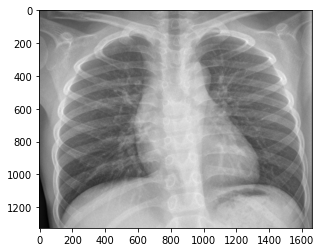

In [104]:
plt.imshow(img)

In [105]:
img.shape

(1326, 1663, 3)

In [106]:
print('total training normal-rays :', len(os.listdir(train_normal_dir)))   # เช็คว่าใน train_normal_dir มีกี่ภาพ
print('total training Pneumonia x-rays:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal-rays :', len(os.listdir(validation_normal_dir)))
print('total validation Pneumonia x-rays:', len(os.listdir(validation_pneumonia_dir)))

total training normal-rays : 74
total training Pneumonia x-rays: 74
total validation normal-rays : 20
total validation Pneumonia x-rays: 20


In [107]:
train_data_generator = ImageDataGenerator(rescale = 1/255)
validation_data_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_data_generator.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 16,
        class_mode = 'binary')

validation_generator = validation_data_generator.flow_from_directory(
        validation_dir,
        target_size = (150,150),
        batch_size = 16,
        class_mode = 'binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Model Create

In [108]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

In [110]:
history=model.fit_generator(generator=train_generator,    
                            epochs = 5,
                            validation_data = validation_generator,
                           )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
10/10 [==============================] - 99s 10s/step - loss: 2.3911 - accuracy: 0.5608 - val_loss: 0.6744 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 12s 1s/step - loss: 0.6474 - accuracy: 0.6892 - val_loss: 0.6849 - val_accuracy: 0.7250
Epoch 3/5
10/10 [==============================] - 12s 1s/step - loss: 0.5606 - accuracy: 0.7500 - val_loss: 0.3786 - val_accuracy: 0.9750
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 0.5195 - accuracy: 0.7973 - val_loss: 0.3270 - val_accuracy: 0.9500
Epoch 5/5
10/10 [==============================] - 12s 1s/step - loss: 0.3325 - accuracy: 0.8784 - val_loss: 0.1682 - val_accuracy: 0.9500


Results

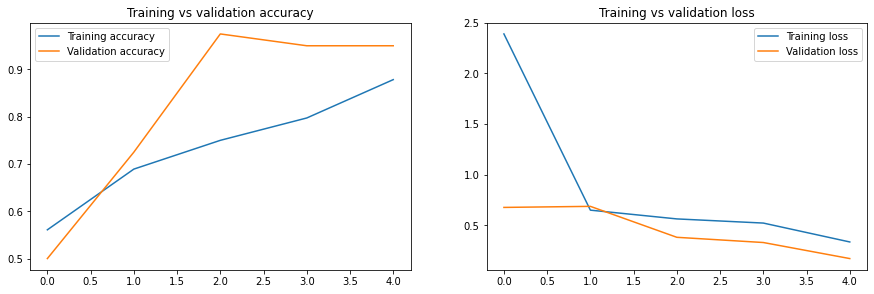

In [111]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

## Multileyer Perceptron 3

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Dataset
x_data = np.array([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
y_data = np.array([[0.], [1.], [1.], [0.] ])

In [ ]:
# Hyperparamters
n_input = 2
n_hidden = 10
n_output = 1
lr = 0.1
epochs = 10000
display_step = 1000

In [ ]:
# Placeholders
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [ ]:
# Weights
W1 = tf.Variable(tf.random_uniform([n_input, n_hidden], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([n_hidden, n_output], -1.0, 1.0))

In [ ]:
# Bias
b1 = tf.Variable(tf.zeros([n_hidden]))
b2 = tf.Variable(tf.zeros([n_output]))

In [ ]:
L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
hy = tf.sigmoid(tf.matmul(L2, W2) + b2)
cost = tf.reduce_mean(-Y*tf.log(hy) - (1-Y) * tf.log(1-hy))
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)


    for step in range(epochs):
        _, c = sess.run([optimizer, cost], feed_dict = {X: x_data, Y: y_data})


        if step % display_step == 0:
            print("Cost: ", c)


    answer = tf.equal(tf.floor(hy + 0.1), Y)
    accuracy = tf.reduce_mean(tf.cast(answer, "float"))


    print(sess.run([hy], feed_dict = {X: x_data, Y: y_data}))
    print("Accuracy: ", accuracy.eval({X: x_data, Y: y_data}))

Cost:  0.71333843
Cost:  0.6279498
Cost:  0.20621604
Cost:  0.06519425
Cost:  0.03448295
Cost:  0.022706565
Cost:  0.01669806
Cost:  0.013108177
Cost:  0.010740512
Cost:  0.009069844
[array([[0.00454739],
       [0.98963535],
       [0.9942653 ],
       [0.01054418]], dtype=float32)]
Accuracy:  1.0
